In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [13]:
# Define parameters
img_size = (48, 48)
batch_size = 64
epochs = 50  # Start with 50 epochs, can be tuned based on performance
num_classes = 7  # 7 emotion categories
learning_rate = 0.0001  # Reduce learning rate for finer adjustments

In [14]:
# Path to the dataset directories
train_dir = 'train'
test_dir = 'test'

# Data augmentation and preprocessing for training and testing sets
train_datagen = ImageDataGenerator(
    rescale=1./255,        # Rescale pixel values to [0, 1]
    rotation_range=30,      # Randomly rotate images by up to 30 degrees
    shear_range=0.2,        # Shear transformations
    zoom_range=0.2,         # Zoom transformations
    horizontal_flip=True,   # Randomly flip images horizontally
    fill_mode='nearest'     # Fill missing pixels after transformation
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale for test set

# Load images from the directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    color_mode='grayscale',  # Because images are grayscale
    batch_size=batch_size,
    class_mode='categorical',  # Because we have multiple classes
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # No need to shuffle the test data
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [15]:
# Build CNN Model
model = Sequential()

# First convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Second convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Third convolutional layer
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten and fully connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer with softmax activation (for multi-class classification)
model.add(Dense(num_classes, activation='softmax'))


In [16]:
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=learning_rate),  # Use reduced learning rate
    loss='categorical_crossentropy',  # For multi-class classification
    metrics=['accuracy']
)

# Print the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 46, 46, 64)        640       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 23, 23, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 10, 10, 128)       0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 10, 10, 128)      

In [17]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)


Epoch 1/50
448/448 [==============================] - 178s 396ms/step - loss: 1.8429 - accuracy: 0.2405 - val_loss: 1.8445 - val_accuracy: 0.2479
Epoch 2/50
448/448 [==============================] - 141s 316ms/step - loss: 1.8059 - accuracy: 0.2495 - val_loss: 1.8041 - val_accuracy: 0.2792
Epoch 3/50
448/448 [==============================] - 140s 312ms/step - loss: 1.7732 - accuracy: 0.2682 - val_loss: 1.7352 - val_accuracy: 0.3280
Epoch 4/50
448/448 [==============================] - 137s 306ms/step - loss: 1.7371 - accuracy: 0.2960 - val_loss: 1.6528 - val_accuracy: 0.3577
Epoch 5/50
448/448 [==============================] - 141s 315ms/step - loss: 1.7024 - accuracy: 0.3202 - val_loss: 1.6310 - val_accuracy: 0.3789
Epoch 6/50
448/448 [==============================] - 141s 314ms/step - loss: 1.6716 - accuracy: 0.3380 - val_loss: 1.5954 - val_accuracy: 0.3878
Epoch 7/50
448/448 [==============================] - 139s 311ms/step - loss: 1.6443 - accuracy: 0.3609 - val_loss: 1.5396 -

In [18]:
# Save the model
# model.save('emotion_detection_model.h5')

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


113/113 [==============================] - 7s 57ms/step - loss: 1.1438 - accuracy: 0.5645
Test Accuracy: 56.45%


In [19]:
# Save the model
model.save('emotion_detection_model.h5')

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


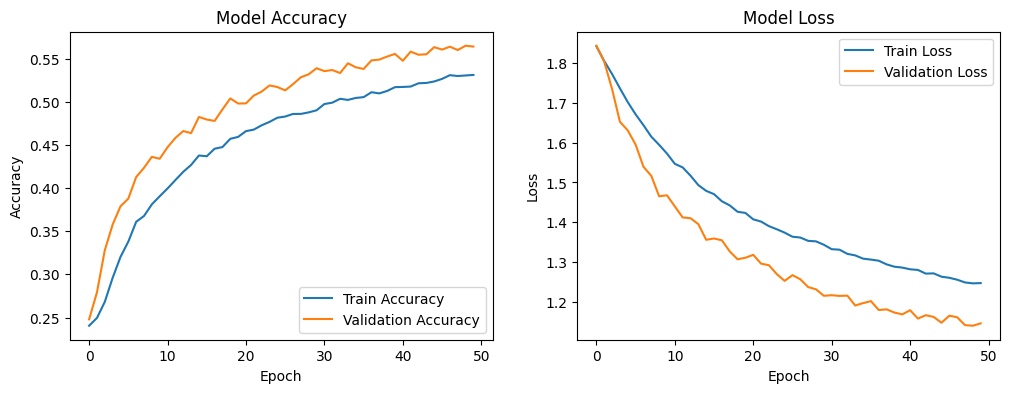

In [20]:
# Plot accuracy and loss over epochs
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()
